In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('C:/Users/kunjd/Desktop/Predicitive_Demand_Forecasting/36/dataset/Final_csv.csv')

In [ ]:
data.head()

,purchase_date,region,product_id,frequency
0,2019-12-28,110001,2dd0a873-be65-4da4-a7b4-02424ed59254,816.0
1,2019-12-28,110001,4d7ef426-45ca-4f7b-9cba-2a5982d35f92,722.0
2,2019-12-28,110001,6465e45a-9359-4d15-a869-fab6cda43fb1,739.0
3,2019-12-28,110001,6f913bc4-359f-4789-a1a6-961697264192,755.0
4,2019-12-28,110001,7b1f25a4-e617-4f48-9601-e601e56a92ef,767.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773275 entries, 0 to 773274
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   purchase_date  773275 non-null  object 
 1   region         773275 non-null  int64  
 2   product_id     773275 non-null  object 
 3   frequency      773274 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.6+ MB


In [ ]:
data['purchase_date']=pd.to_datetime(data['purchase_date'])

In [ ]:
data.dtypes

ds    datetime64[ns]
y             object
dtype: object

In [ ]:
data['product_id_encoded'] = pd.Categorical(data['y']).codes + 1
data['product_id_encoded'] = data['product_id_encoded'].astype(int)

In [ ]:
data.drop(columns=['region','frequency'],axis=1,inplace=True)

In [ ]:
#data.columns=['ds','y']

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773275 entries, 0 to 773274
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ds                  773275 non-null  datetime64[ns]
 1   y                   773275 non-null  object        
 2   product_id_encoded  773275 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.7+ MB


In [ ]:
data.drop(columns=['y'],inplace=True)

In [ ]:
data.rename(columns={'product_id_encoded': 'y'}, inplace=True)

In [ ]:
my_model = Prophet(interval_width=0.95)

In [ ]:
my_model.fit(data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg02gdubb/sp32e_id.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg02gdubb/nl6zyz42.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16735', 'data', 'file=/tmp/tmpg02gdubb/sp32e_id.json', 'init=/tmp/tmpg02gdubb/nl6zyz42.json', 'output', 'file=/tmp/tmpg02gdubb/prophet_model43138k7h/prophet_model-20240317083633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:36:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = my_model.make_future_dataframe(periods=365, freq='MS')
future_dates.head()

,ds
0,2019-12-28
1,2019-12-29
2,2019-12-30
3,2019-12-31
4,2020-01-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2019-12-28,196.903126,-29.025175,438.368128
1,2019-12-29,197.513178,-38.359307,417.380100
2,2019-12-30,197.540060,-16.671599,430.368975
3,2019-12-31,198.211912,-33.372740,428.716086
4,2020-01-01,197.897808,-25.724302,426.122432


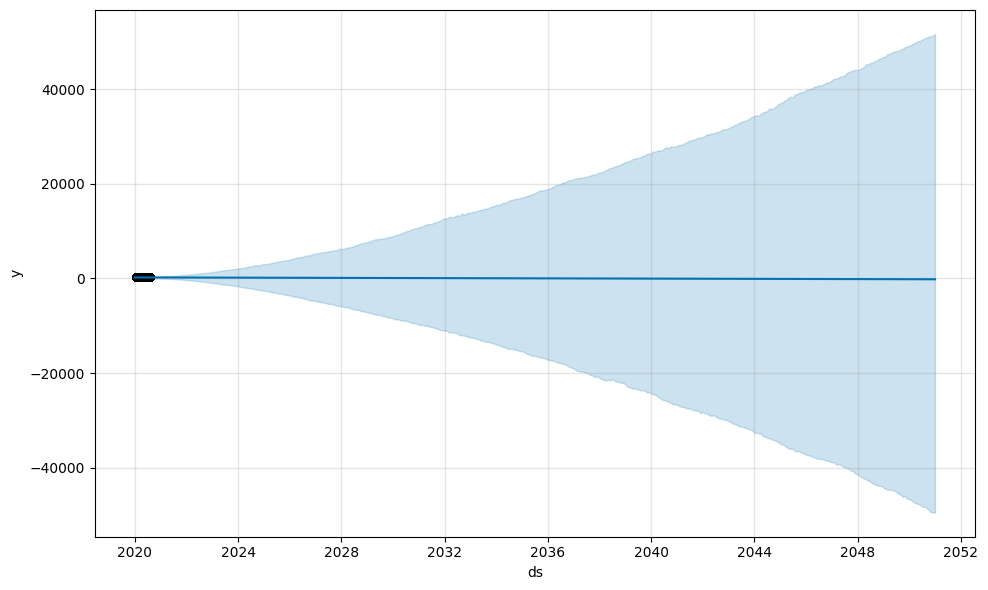

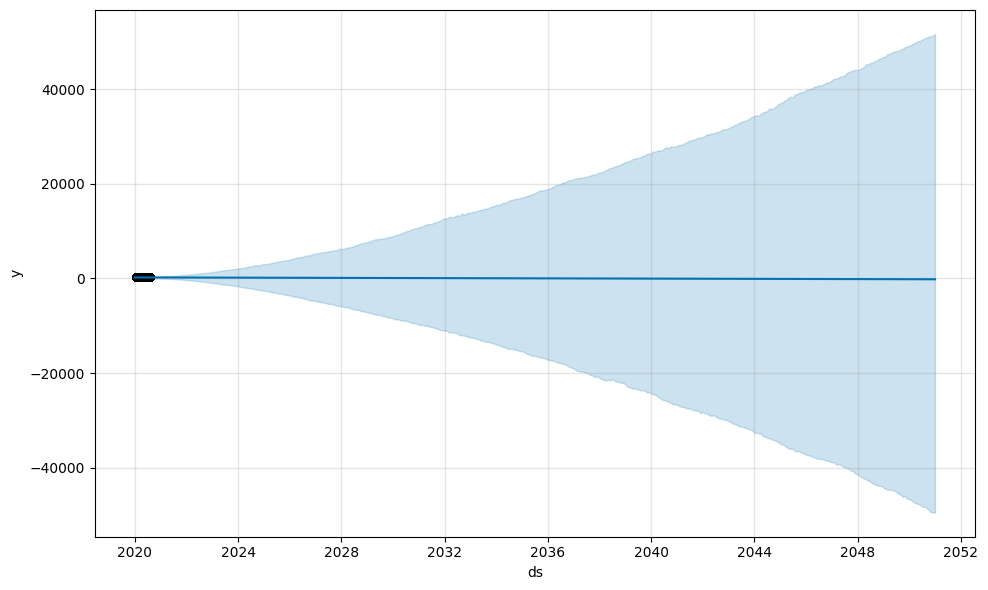

In [ ]:
my_model.plot(forecast, uncertainty=True)

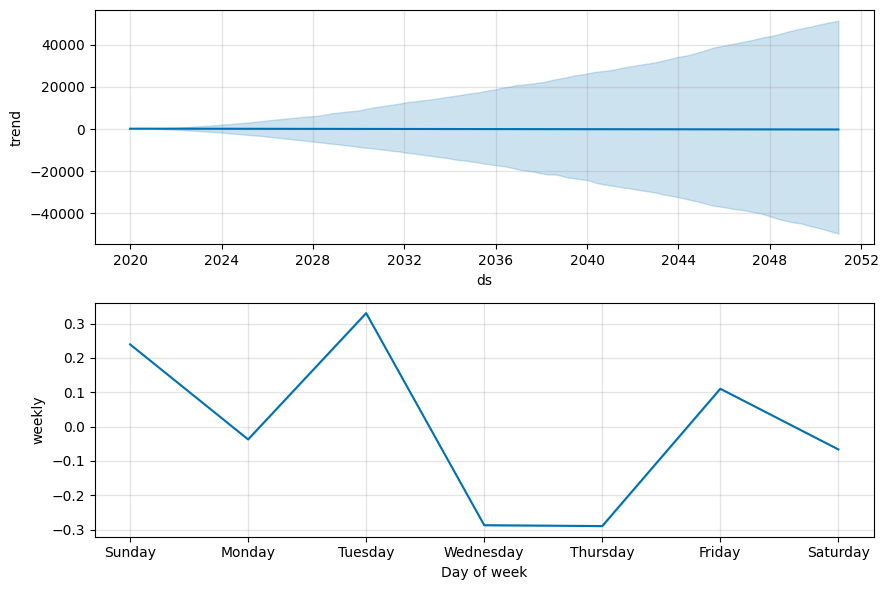

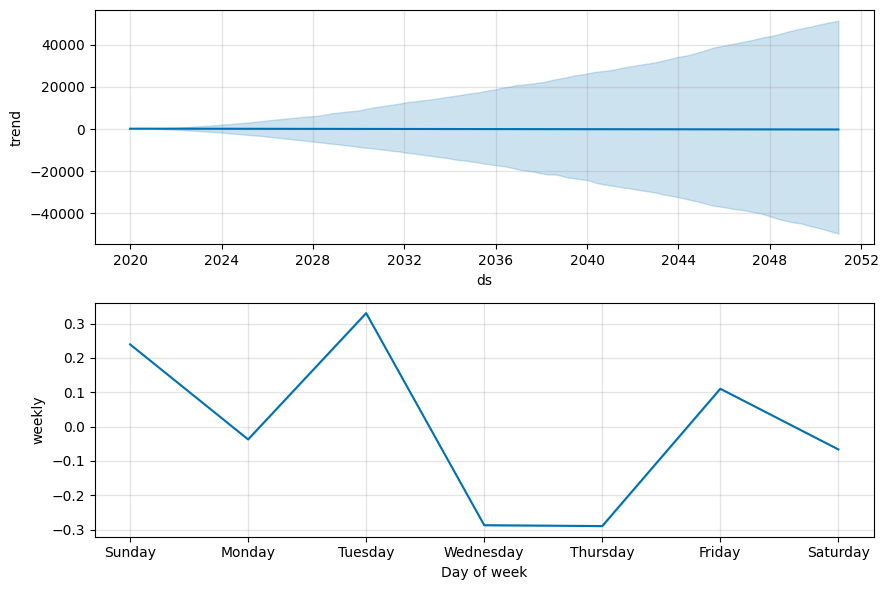

In [ ]:
my_model.plot_components(forecast)

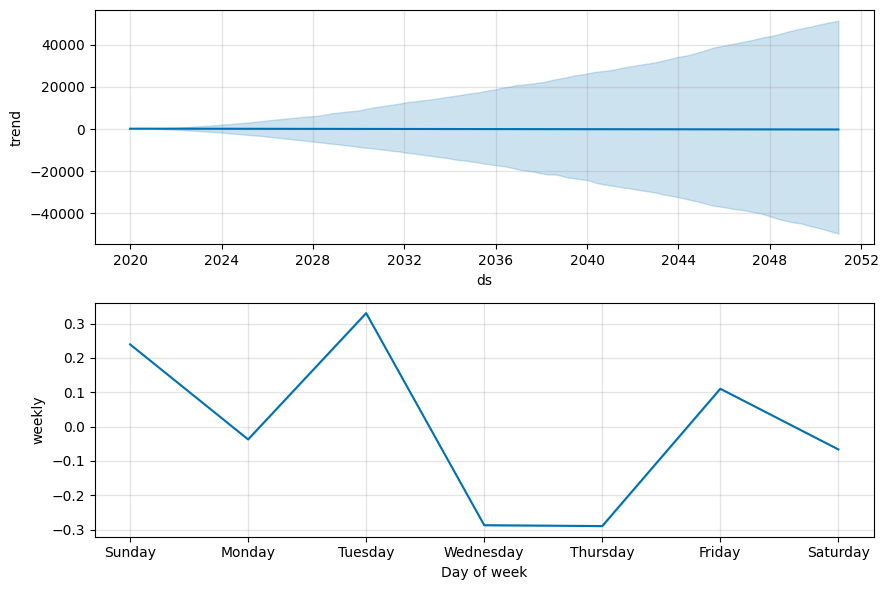

In [ ]:
fig1 = my_model.plot_components(forecast)